In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from pandas_profiling import ProfileReport
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


In [89]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
df=df.drop(['region'],axis=1)

In [91]:
data = ff.create_table(df.head())
data

# EDA WITH SWEETVIZ AND DTALE

In [92]:
import sweetviz as sv

In [93]:
report=sv.analyze(df)

In [94]:
# view and save
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [95]:
pip install sweetviz datale pandas_profiling

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement datale (from versions: none)
ERROR: No matching distribution found for datale


In [96]:
import dtale

In [97]:
d=dtale.show(df)

In [98]:
# view result
d

In [99]:
# checking for missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [100]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


categorical variables

In [102]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import numpy as np
import pandas as pd
import plotly.graph_objs as go

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['age'])][['age']]
chart, labels = np.histogram(s, bins=20)
import scipy.stats as sts
kde = sts.gaussian_kde(s['age'])
kde_data = kde.pdf(np.linspace(labels.min(), labels.max()))
# main statistics
stats = df['age'].describe().to_frame().T
charts = [
	go.Bar(x=labels[1:], y=chart, name='age distrubution'),
	go.Scatter(
		x=list(range(len(kde_data))), y=kde_data, name='KDE',		yaxis='y2', xaxis='x2',		line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'age Histogram (bins: 20) w/ KDE'},
    'xaxis2': {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},
    'yaxis': {'side': 'left', 'title': {'text': 'Frequency'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'KDE'}}
}))
figure.show()

as we can see from  the histogram above our dataset mostlty consits of early 20s  and the other age distrubution  is normaly distrubuted 

In [103]:
# make a list of the numerical variables first
numerical = [var for var in df.columns if df[var].dtype!='O']
print(numerical)

['age', 'bmi', 'children', 'charges']


In [104]:
numerical_continous=df[['age','charges','bmi']]
numerical_continous.shape

(1338, 3)

In [105]:
numerical_discrete=df['children']
numerical_discrete.head()

0    0
1    1
2    3
3    0
4    0
Name: children, dtype: int64

# checking and removing outliers in numerical_continous data by z-score

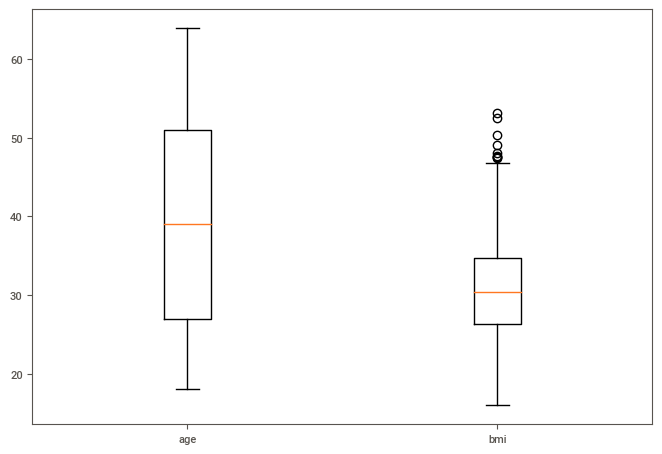

In [106]:
plt.boxplot([df.age,df.bmi] , labels = ['age' , 'bmi'])
plt.show()

In [107]:
from scipy import stats
z=np.abs(stats.zscore(df.bmi))
print(z)

[0.45332    0.5096211  0.38330685 ... 1.0148781  0.79781341 0.26138796]


In [108]:
df.shape

(1338, 6)

In [109]:
threshold=2
print(np.where(z>3))

(array([ 116,  847, 1047, 1317], dtype=int64),)


In [110]:
df_clean=df[(z< 2)]
print(df_clean)


      age     sex     bmi  children smoker      charges
0      19  female  27.900         0    yes  16884.92400
1      18    male  33.770         1     no   1725.55230
2      28    male  33.000         3     no   4449.46200
3      33    male  22.705         0     no  21984.47061
4      32    male  28.880         0     no   3866.85520
...   ...     ...     ...       ...    ...          ...
1333   50    male  30.970         3     no  10600.54830
1334   18  female  31.920         0     no   2205.98080
1335   18  female  36.850         0     no   1629.83350
1336   21  female  25.800         0     no   2007.94500
1337   61  female  29.070         0    yes  29141.36030

[1281 rows x 6 columns]


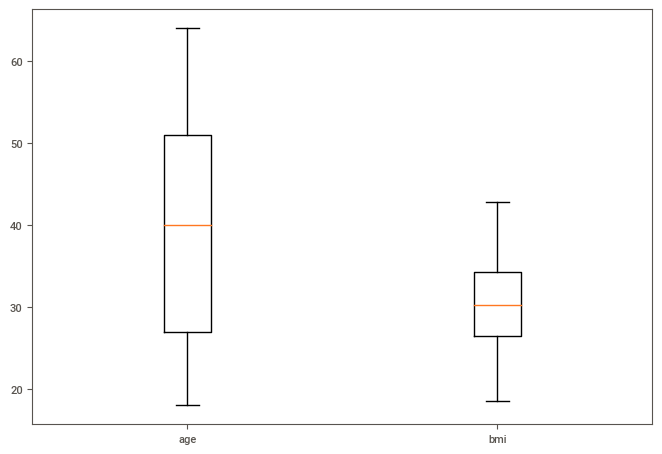

In [111]:
plt.boxplot([df_clean.age, df_clean.bmi] , labels = ['age' , 'bmi'])
plt.show()

THE PLOT ABOVE SHOWS NO MORE OUTLIERS, IT SHOWS THAT WITH THRESHOLD OF 2, MEANING IF WE MAKE OUR OUTPUT TO BE BETWEEN -2 AND 2, WE ELIMANATE OUTLIERS.

In [112]:
# find categorical variables
categorical = [var for var in df_clean.columns if df_clean[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 2 categorical variables


In [113]:

for var in df_clean.columns :
      if df_clean[var].dtype=='O':
             print(var)
             #print('There are {} categorical variables'.format(len(categorical)))

sex
smoker


In [114]:
categorical=df_clean[['sex','smoker']]
categorical

,sex,smoker
0,female,yes
1,male,no
2,male,no
3,male,no
4,male,no
...,...,...
1333,male,no
1334,female,no
1335,female,no
1336,female,no


In [115]:
categorical_discrete=df_clean['children']
categorical_discrete

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1281, dtype: int64

In [116]:
df_clean

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


# encoding categorical features

In [117]:
#separating target variable from features
# creating x(all feature columns except target)
x=df_clean.drop("charges",axis=1)

# creating y (the output column)
y=df_clean['charges']

In [118]:
x

,age,sex,bmi,children,smoker
0,19,female,27.900,0,yes
1,18,male,33.770,1,no
2,28,male,33.000,3,no
3,33,male,22.705,0,no
4,32,male,28.880,0,no
...,...,...,...,...,...
1333,50,male,30.970,3,no
1334,18,female,31.920,0,no
1335,18,female,36.850,0,no
1336,21,female,25.800,0,no


In [119]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1281, dtype: float64

In [120]:
#Creating input data from dataframe df on variable Positive Skewness with input values ranging from 1 to 130
inp_array = y 
print ("Input array : ", inp_array)

Input array :  0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1281, dtype: float64


In [121]:
#Applying log10 transformation with output values ranging from 0 to 2+
y = np.log10(inp_array) 
print ("out_array : ", y)

out_array :  0       4.227499
1       3.236928
2       3.648308
3       4.342116
4       3.587358
          ...   
1333    4.025328
1334    3.343602
1335    3.212143
1336    3.302752
1337    4.464510
Name: charges, Length: 1281, dtype: float64


In [122]:
x=pd.get_dummies(x,columns=['smoker','sex'])
x.head()

,age,bmi,children,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.900,0,0,1,1,0
1,18,33.770,1,1,0,0,1
2,28,33.000,3,1,0,0,1
3,33,22.705,0,1,0,0,1
4,32,28.880,0,1,0,0,1


# feature selection

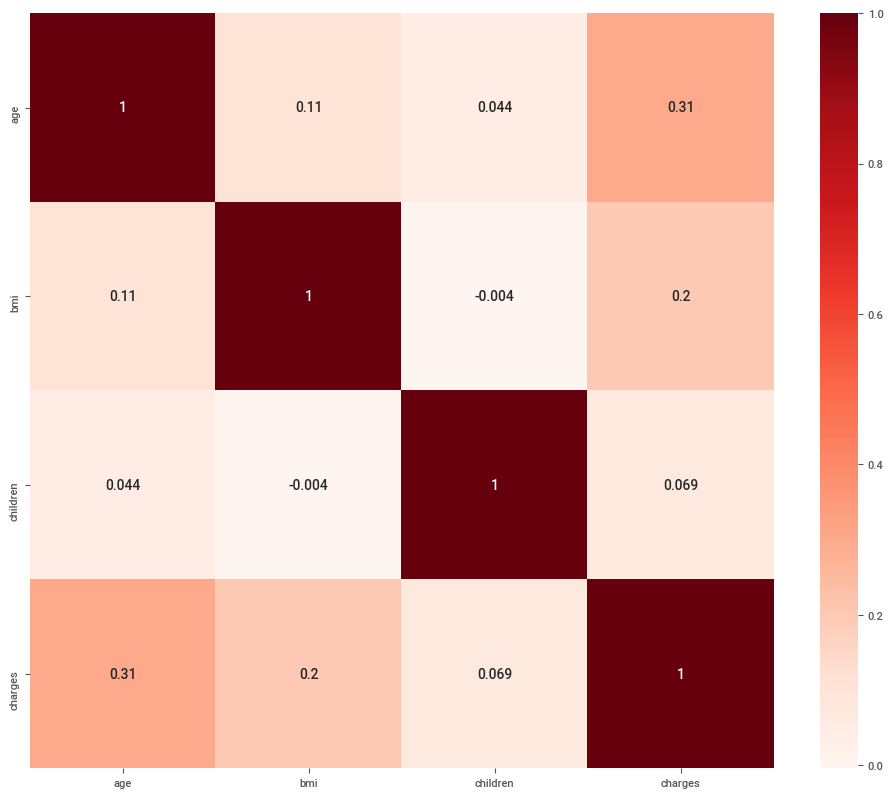

In [123]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_clean.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [124]:
#Correlation with output variable
cor_target = abs(cor["charges"])
cor_target

age         0.305545
bmi         0.201364
children    0.068780
charges     1.000000
Name: charges, dtype: float64

In [125]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

age        0.305545
bmi        0.201364
charges    1.000000
Name: charges, dtype: float64

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [127]:
x_train.shape

(1024, 7)

In [128]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [129]:
y

0       4.227499
1       3.236928
2       3.648308
3       4.342116
4       3.587358
          ...   
1333    4.025328
1334    3.343602
1335    3.212143
1336    3.302752
1337    4.464510
Name: charges, Length: 1281, dtype: float64

we do log transfomation on target variable to make the values have a normal distrubution and  remove outliers

# Random Forest Regressor

In [130]:
>>> from sklearn.ensemble import RandomForestRegressor


In [131]:
model=RandomForestRegressor(n_jobs=-1,
                              random_state=50)
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=50)

In [132]:
model.score(x_test,y_test)

0.8436938482400493

# LinearRegression

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
# regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [135]:
regression_model.score(x_test,y_test)

0.8085505558890181

# gradient Boosting regressor

In [136]:
>>> import numpy as np
>>> from sklearn.metrics import mean_squared_error
>>> from sklearn.datasets import make_friedman1
>>> from sklearn.ensemble import GradientBoostingRegressor

In [137]:
>>> x, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)

In [138]:
>>> est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
...     max_depth=1, random_state=0, loss='ls').fit(x_train, y_train)
>>> mean_squared_error(y_test, est.predict(x_test))

0.03355476798399792

# RandomizedSearchCV

In [139]:

%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(100, 1000, 100),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-3,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=5,
                              cv=4,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(x_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.1s finished


Wall time: 7.52 s


RandomizedSearchCV(cv=4,
                   estimator=RandomForestRegressor(n_jobs=-3, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   verbose=True)

In [140]:
rs_model.score(x_test,y_test)

0.8706994553090125

# Random forest regressor

In [141]:
from sklearn.ensemble import RandomForestRegressor



In [142]:
model=RandomForestRegressor(n_jobs=-8,
                              random_state=80)
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-8, random_state=80)

In [143]:
 y_pred = model.predict(x_test)

# MEAN ABSOLUTE ERROR

In [144]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)




0.0907870278470779

# R² Score

In [145]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8357063308432916

# MEAN SQUARED ERROR

In [146]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


0.027166255382030366